In [5]:
#Mileage or MPG Prediction of a vehicle

In [ ]:
#Objective - We will predict the fuel efficiency(miles per gallon) of a vehicle based on the independent variables like weight,displacement,model year,etc.
#I have used Linear Regression to predict

In [ ]:
#Data Source - https://github.com/YBIFoundation/Dataset/blob/main/MPG.csv

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('MPG.csv')

In [3]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [4]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [5]:
df=df.dropna()

In [6]:
df.corr()

C:\Users\Dell\AppData\Local\Temp\ipykernel_3016\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316
model_year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000


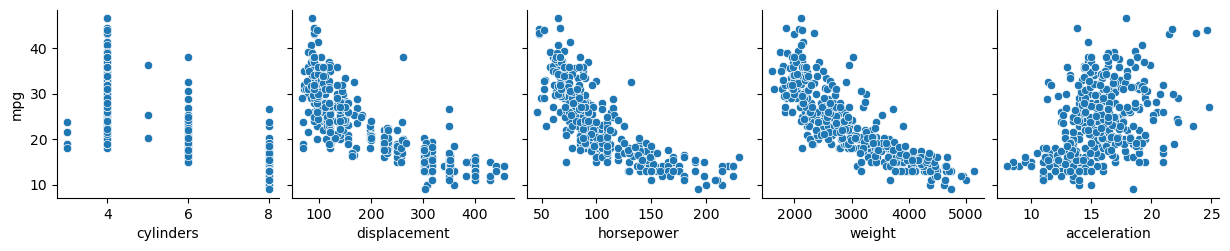

In [7]:
sns.pairplot(data=df,x_vars=['cylinders','displacement','horsepower','weight','acceleration'],y_vars='mpg')

<Axes: xlabel='horsepower', ylabel='mpg'>

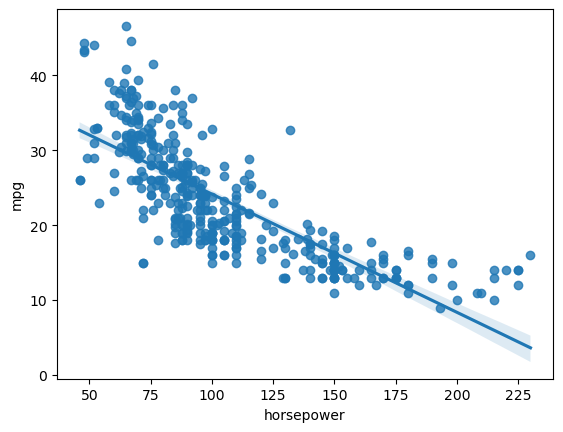

In [8]:
sns.regplot(data=df,x='horsepower',y='mpg')

In [9]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [10]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [11]:
X=df[['displacement','horsepower','weight','acceleration']]
y=df['mpg']

In [19]:
X.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [ ]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()

In [ ]:
X=scale.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.7,random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [ ]:
model.fit(X_train,y_train)
X_train.shape
X_test.shape

In [ ]:
prediction=model.predict(X_test)

In [ ]:
model.intercept_

In [20]:
model.coef_

array([-1.85802818, -1.90430887, -3.92488692, -1.10694098])

In [21]:
from sklearn.metrics import mean_absolute_error,mean_squared_error 

In [22]:
MAE=mean_absolute_error(y_test,prediction)
MAE

3.5473666221342883

In [23]:
RMSE=np.sqrt(MAE)
RMSE

1.8834454125708788

In [25]:
mean_squared_error(y_test,prediction)

21.433615710649555

In [26]:
test=np.array([[302.0,140.0,5000,12]])
a=scale.transform(test)
model.predict(a)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([12.00426577])

In [ ]:
#Explanation - We Created a Linear model in which we split our data in training and testing after that we evaluated the performance of our model and at last we predicted values for new inputs.

In [29]:
from sklearn.preprocessing import PolynomialFeatures

In [30]:
polyfeatures=PolynomialFeatures(degree=2)
X_train2=polyfeatures.fit_transform(X_train)
X_test2=polyfeatures.fit_transform(X_test)

In [32]:
model.fit(X_train2,y_train)

LinearRegression()

In [33]:
model.intercept_

21.733017077728533

In [34]:
model.coef_

array([ 0.        , -3.26091291, -3.46975394, -2.32235794, -0.98282957,
       -2.74731035,  4.40433223,  5.46510925,  2.83709496, -0.38862877,
       -2.08055251, -1.39734323, -1.62591299, -0.06384767,  0.05003154])

In [ ]:
#Explanation - We Created a Polynomial model in which we split our data in training and testing after that we evaluated the performance of our model and at last we predicted values for new inputs.We set the degree=2 which shows quadratic relation between dependent and independent variables.